In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

datasheet = pd.read_csv('applesOranges.csv')
# print(datasheet)
#  EXERCISE 1:

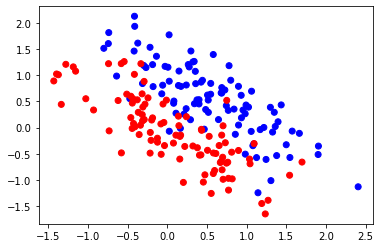

In [9]:
def label(datasheet,column):
    '''returns the color coding based on the values of column'''
    col = []
    red = ['red']
    blue = ['blue']
    i = 0
    for label, row in datasheet.iterrows() :
        if row[column] == True :
            col = col + red
        else:
            col = col + blue
    return col            


label_original = label(datasheet,'y')

def scatterplot(x1, x2, col):
    ''' plotting a showing of x2 vs x1'''
    plt.scatter(x1, x2,c = col)
    plt.show()


scatterplot(datasheet[['x.2']],datasheet[['x.1']], label_original) 

In [15]:
# array containing the angles
alpha = np.array(range(0,190,10))
# print(alpha)
# calculate the components for the vectors
w1 = np.cos(alpha*np.pi/180)
w2 = np.sin(alpha*np.pi/180)
# print(w1)


# create the vectors as a dataframe
w = {
    'w1': w1,
    'w2': w2}
vector = pd.DataFrame(w)        
   

# print(vector)

In [16]:

def sig(w1, w2, x1, x2, b):
    '''transfer function'''
    y= np.sign(w1*x1 + w2*x2 - b)
    y[y != 1] = 0
    return y

#apply the transfer function on the different weight vectors considering b=0
output = {}
for i in range(0,19):
    y = sig(vector.iloc[i,0],vector.iloc[i,1],datasheet['x.1'],datasheet['x.2'],0)
    key = 'y'+str(i)
    output[key] = y

output1 = pd.DataFrame(output)  
print(output1)



      y0   y1   y2   y3   y4   y5   y6   y7   y8   y9  y10  y11  y12  y13  \
0    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
1    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
2    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0   
3    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
4    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
195  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0   
196  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
197  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
198  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
199  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

     y14  y15  y16  y17  y18  
0    1.0  1.0  0.0  0.0  0.0  
1    1.0  1.0

In [17]:
def classification(lst,output, datasheet):
    ''' calculates the correct classification performance %'''
    count = 0
    classif=[]
    for i in lst:
        count = 0
        for ind,val in datasheet.iterrows():
            if output.iloc[ind,i] == datasheet.iloc[ind,3]:
                count =count + 1
               
        percentage = count*100/datasheet.shape[0]
        classif.append(percentage)
    return classif

#calculate the classification performance for the different weight vectors
list1 = [i for i in range(0,19)]
classification1 = classification(list1,output1, datasheet)
print(classification1)
    

         


       

[33.0, 29.0, 26.5, 23.5, 23.0, 25.5, 28.5, 29.0, 32.5, 34.5, 39.0, 43.0, 46.5, 51.0, 55.5, 57.0, 61.5, 64.5, 67.0]


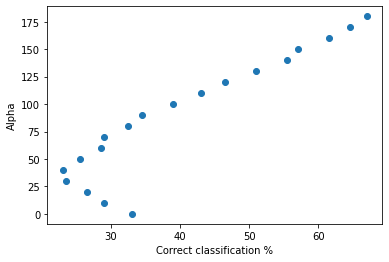

In [27]:
# plot the classification vs alpha 
plt.scatter(classification1, alpha)
plt.xlabel('Correct classification %')
plt.ylabel('Alpha')
plt.show()


In [28]:
# find the vector with the highest classification performance
v_highest = vector.iloc[classification1.index(max(classification1)),:]
print(v_highest)

w1   -1.000000e+00
w2    1.224647e-16
Name: 18, dtype: float64


In [20]:
# array containing the values  for b
const= np.round(np.arange(-3,3.1,0.1),1)
# print(const)

#apply the transfer function for b = const
output = {}
for b in const:
    
    y = sig(v_highest['w1'],v_highest['w2'],datasheet['x.1'],datasheet['x.2'],b)
    key = 'y'+str(b)
    output[key] = y

output2 = pd.DataFrame(output)  
# print(output2)

#find the constant with the highest classification performance
list2 = [i for i in range(0,len(const))]
classification2 = classification(list2,output2, datasheet)
# print(classification2)
const_highest= const[classification2.index(max(classification2))]
print(const_highest)


-0.2


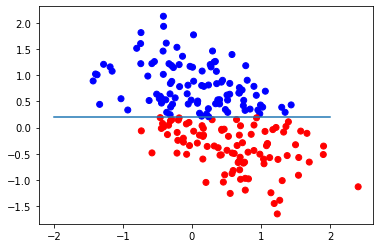

In [30]:
# plot the classification corresponding to the previous w and b parameters
label_combi = label(output2,'y'+str(const_highest))
plt.scatter(datasheet[['x.2']],datasheet[['x.1']], c =label_combi)
# plot the weight vector w
x = np.linspace(-2,2,100)
y = (v_highest['w2']/v_highest['w1'])*x + 0.2
plt.plot(x,y)

#this looks wrong

In [31]:
# finding all possible combinations of alpha and b
combi_alpha_const= pd.DataFrame(list(itertools.product(alpha,const)))
# print(combi_alpha_const)

def all_comb(param,datasheet):
    '''returns a datasheet corresponding to the classification resulting from param'''
    output = {}
    key = 0
    for ind,val in param.iterrows():
        w1 = np.cos(param.iloc[ind,0])
        w2 = np.sin(param.iloc[ind,0])
        y = sig(w1,w2,datasheet['x.1'],datasheet['x.2'],param.iloc[ind,1])
        output[key] = y
        key = key + 1
    output2 = pd.DataFrame(output)
    return output2


# find all possible output values
all_combi= all_comb(combi_alpha_const, datasheet)
# print(all_combi)

#calculate the different classification performances
list3 = [i for i in range(0,len(combi_alpha_const))]
classification3 = classification(list3,all_combi, datasheet)
# print(classification3)

#find the best parameter combination
best_param= np.array(combi_alpha_const.iloc[classification3.index(max(classification3)),:])
# print (best_param)
print('Best parameter set is: alpha = ' + str(best_param[0]) + ' and b = ' + str(best_param[1]))




Best parameter set is: alpha = 10.0 and b = -0.4


0


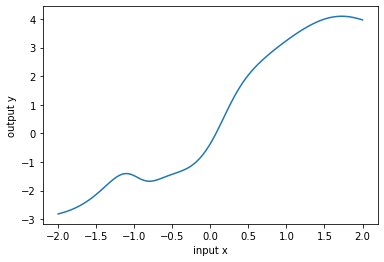

1


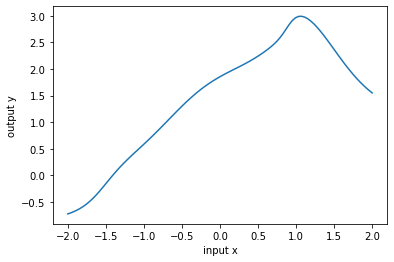

2


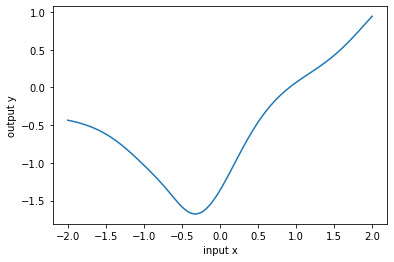

3


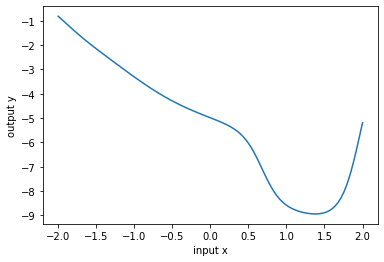

4


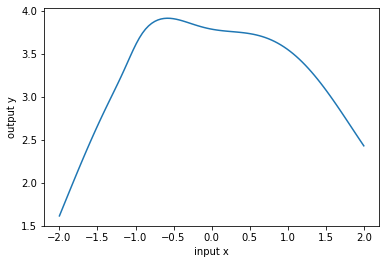

5


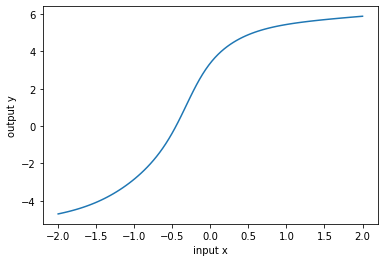

6


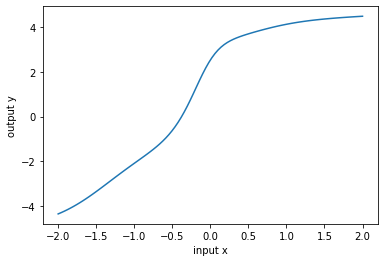

7


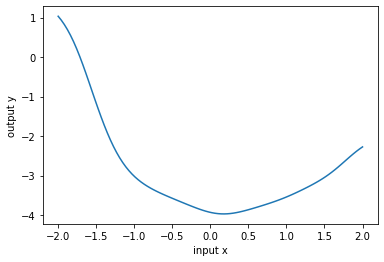

8


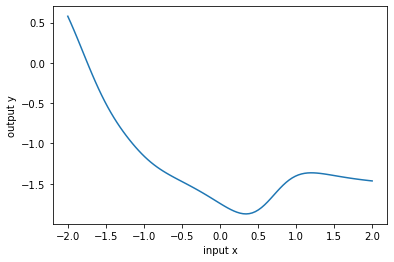

9


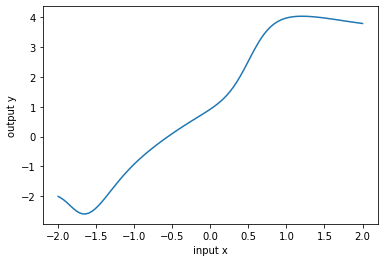

10


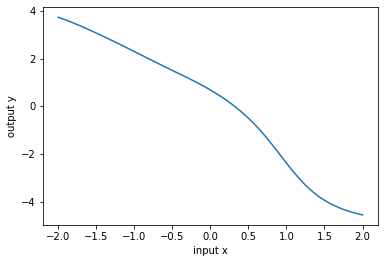

11


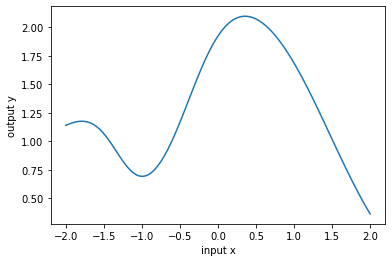

12


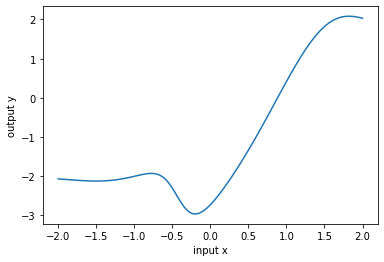

13


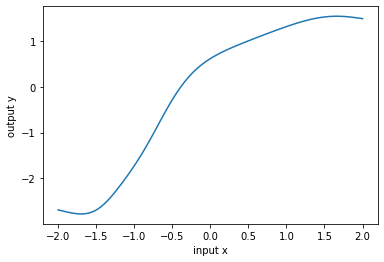

14


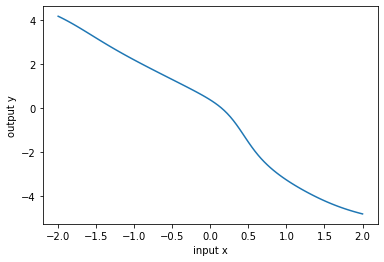

15


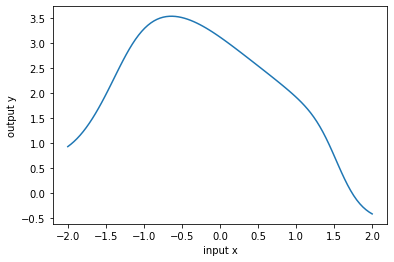

16


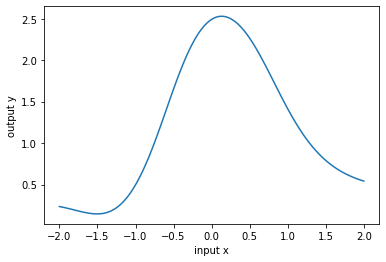

17


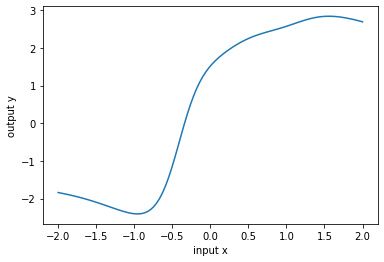

18


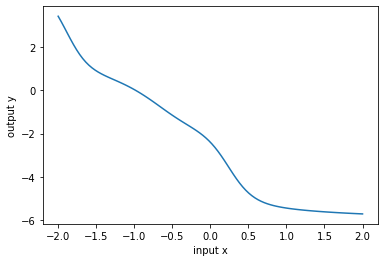

19


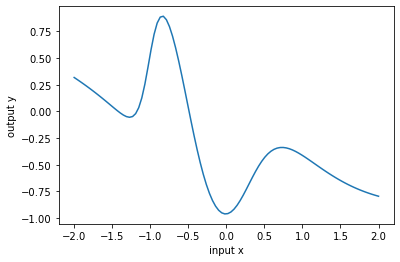

20


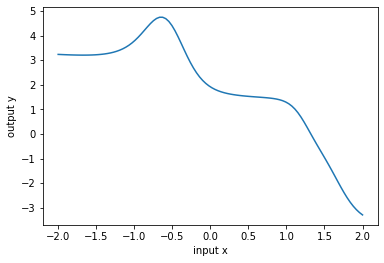

21


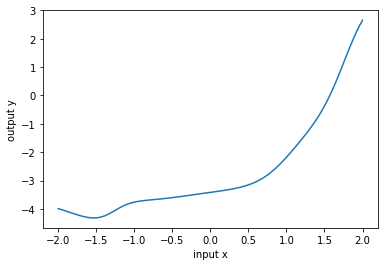

22


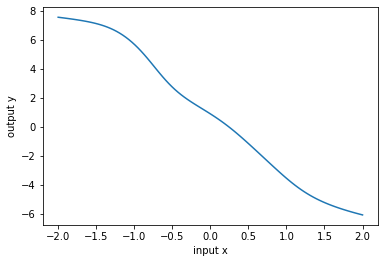

23


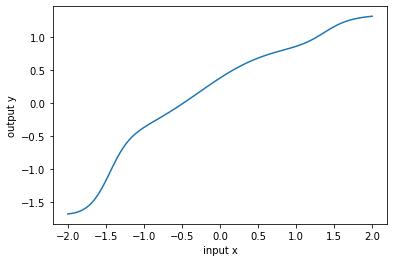

24


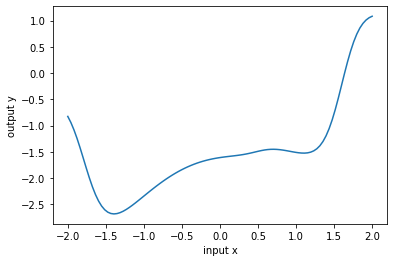

25


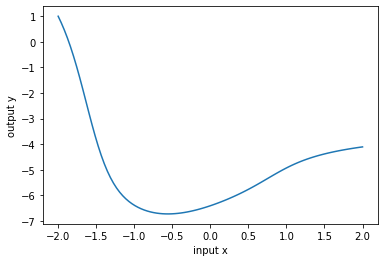

26


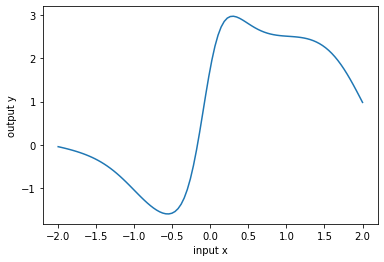

27


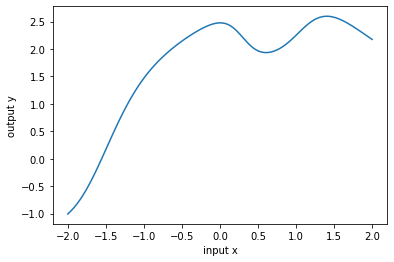

28


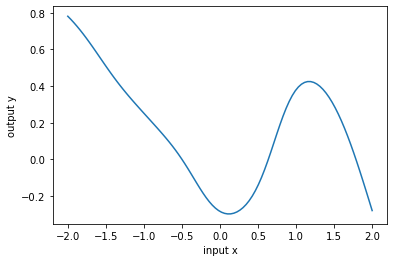

29


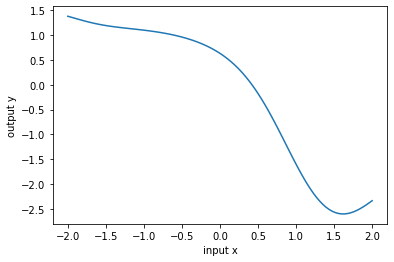

30


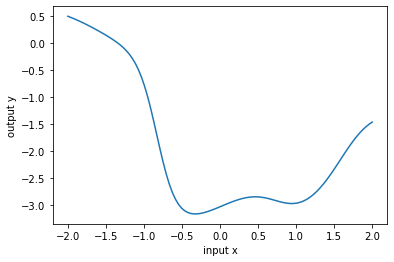

31


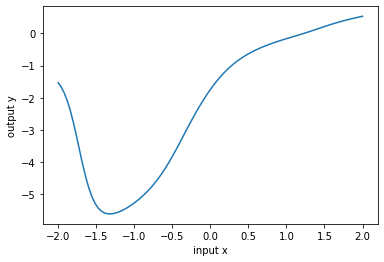

32


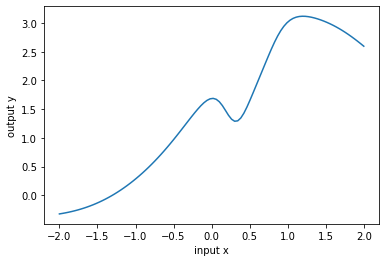

33


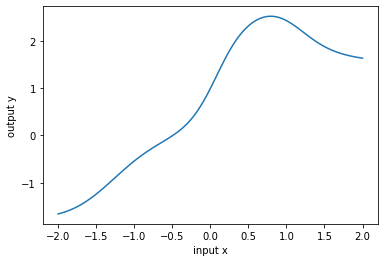

34


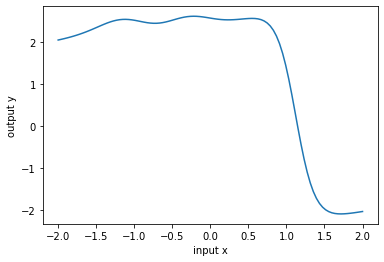

35


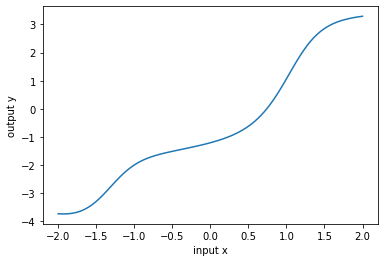

36


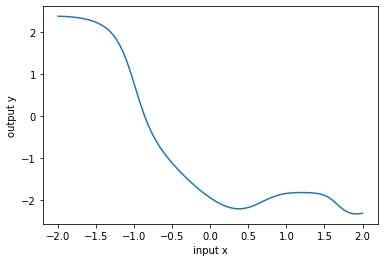

37


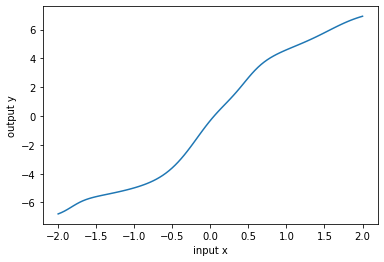

38


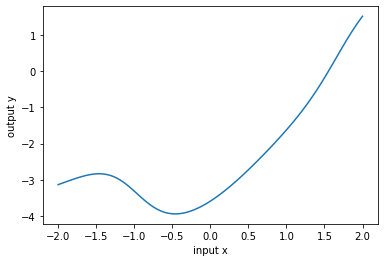

39


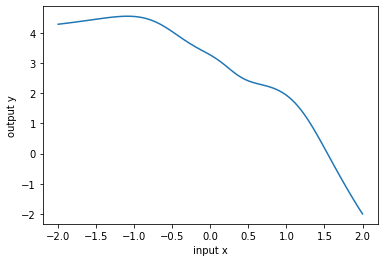

40


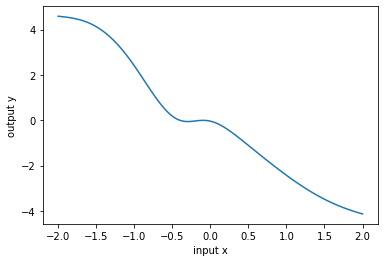

41


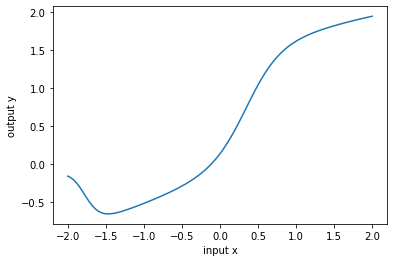

42


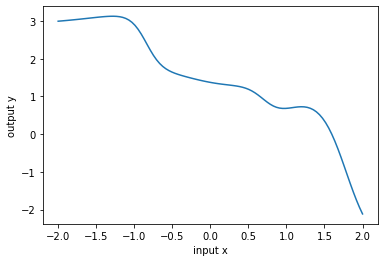

43


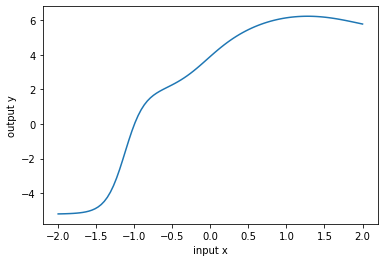

44


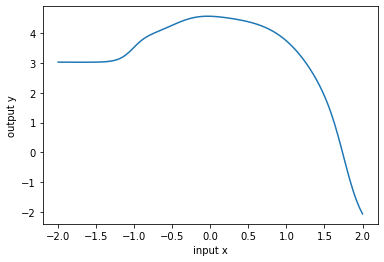

45


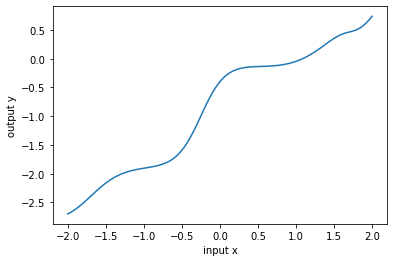

46


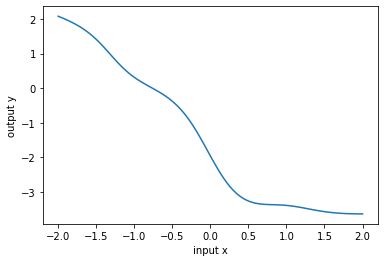

47


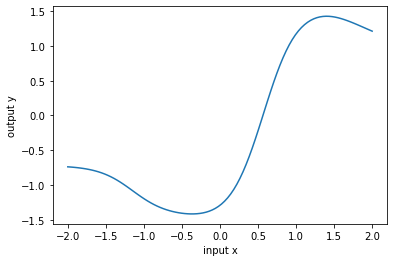

48


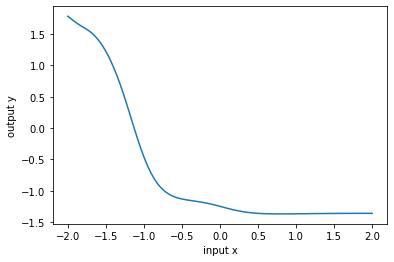

49


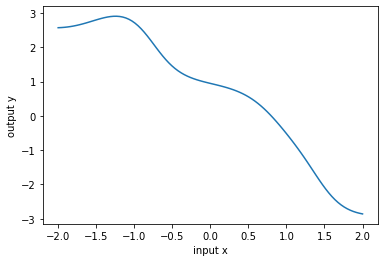

In [32]:
# EXERCISE 2
def param_generator(n,var_a):
    '''generates the random variables a, w , b n times '''
    a=[]
    b=[]
    w=[]
    for i in range(0,n):
        a = np.append(a,np.random.normal(0,var_a))
        w = np.append(w,np.random.normal(0,1)) 
        b = np.append(b,np.random.uniform(-2,2))
    return a,w,b 


def activ_funct(n,a,w,b,x):
    '''calculates the input output function'''
    y= 0
    for i in range(0,n):
        y = y + w[i]*np.tanh(a[i]*(x - b[i]))
    return y

def plot_MLP(N,n,a,w,b,x,var_a):
    '''Plots the input output function for N MLP'''
    for i in range(0,N):
        print(i)
        a,w,b = param_generator(n,var_a)
        f_x = activ_funct(n,a,w,b,x)
        plt.plot(x,f_x)
        plt.xlabel('input x')
        plt.ylabel('output y')
        plt.show()
# plot the input output function for x in [-2,2]
x_range = np.linspace(-2,2,100)
a=[]
b=[]
w=[]
plot_MLP(50,10,a,w,b,x_range,2)




0


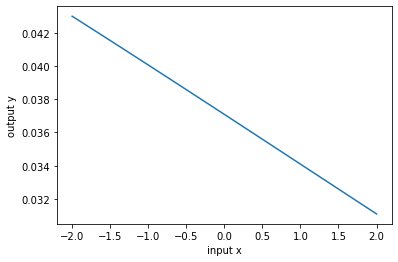

1


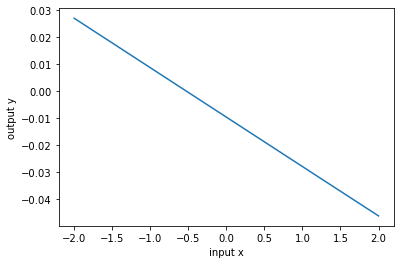

2


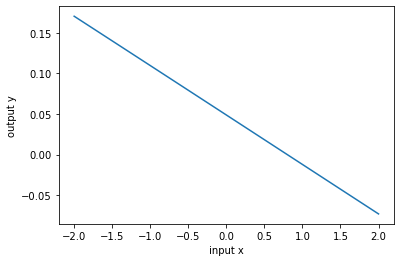

3


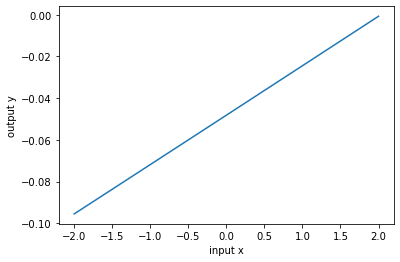

4


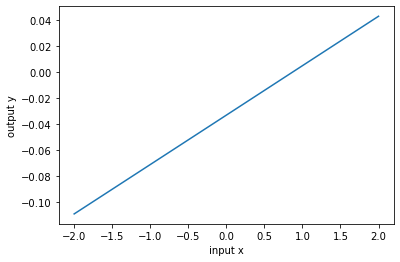

5


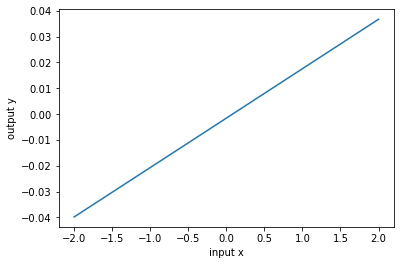

6


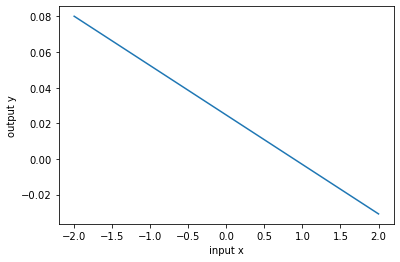

7


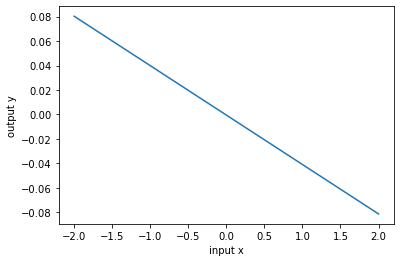

8


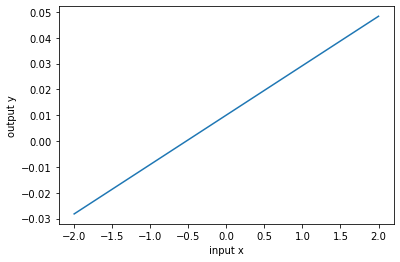

9


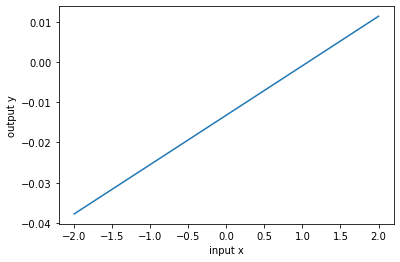

10


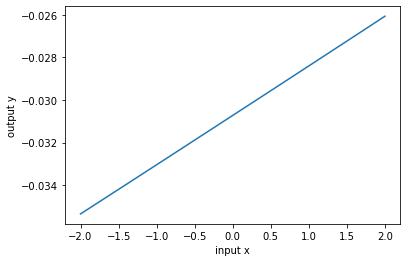

11


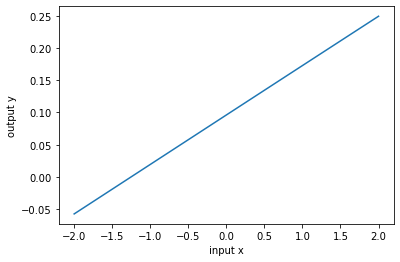

12


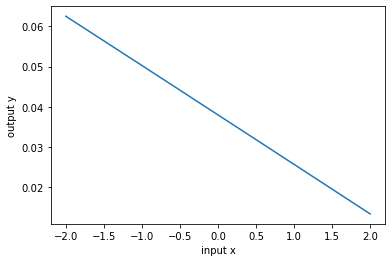

13


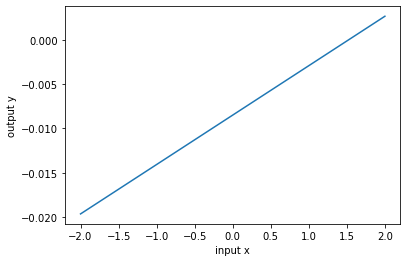

14


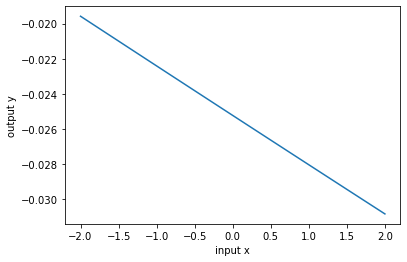

15


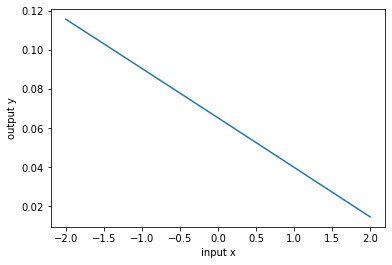

16


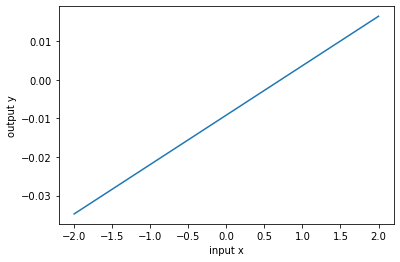

17


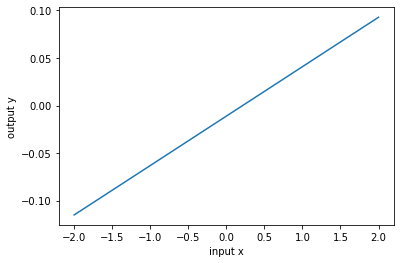

18


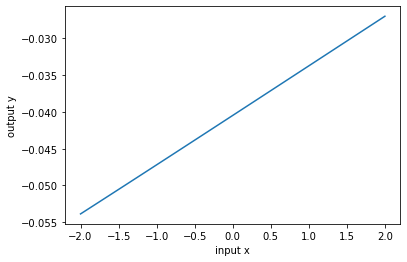

19


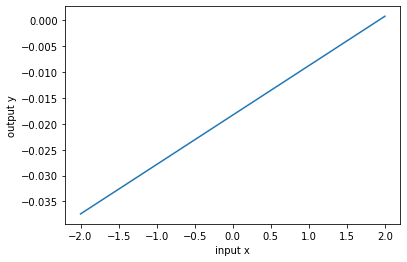

20


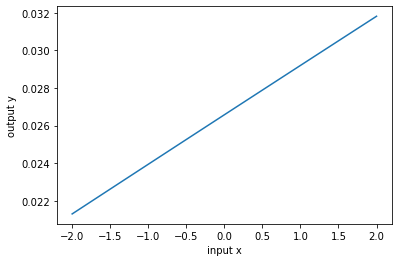

21


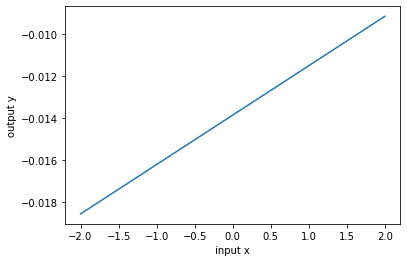

22


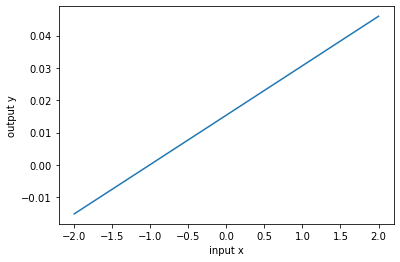

23


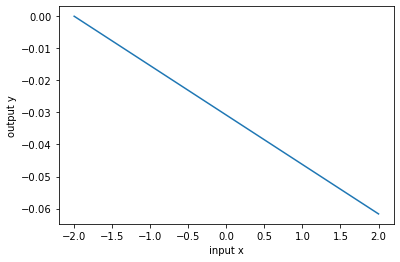

24


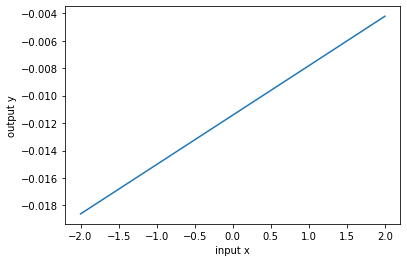

25


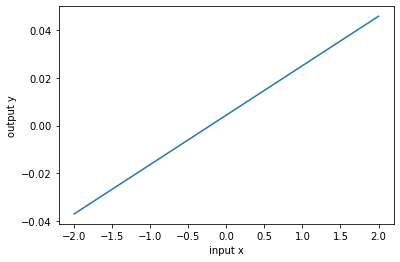

26


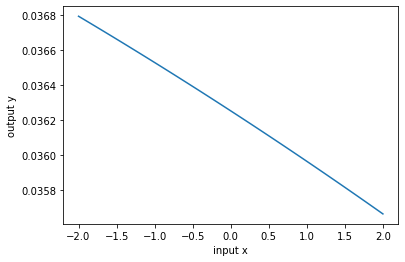

27


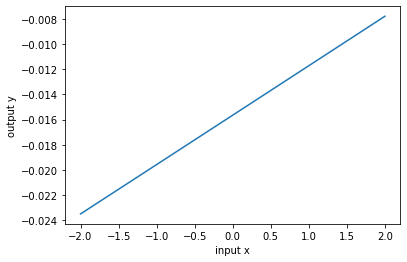

28


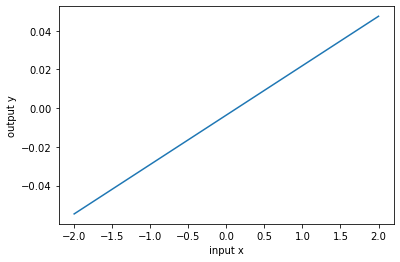

29


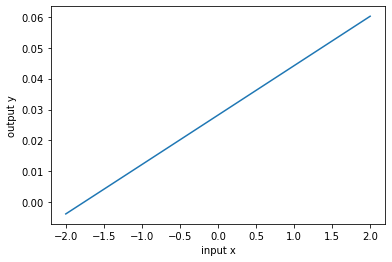

30


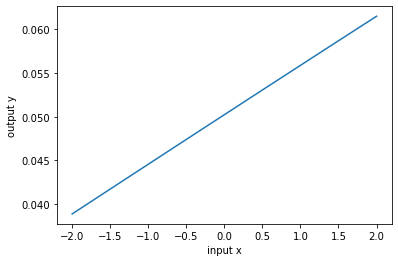

31


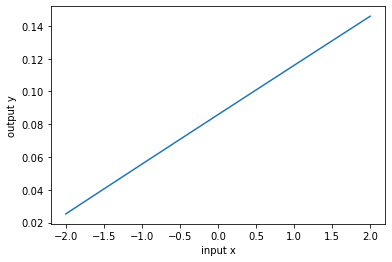

32


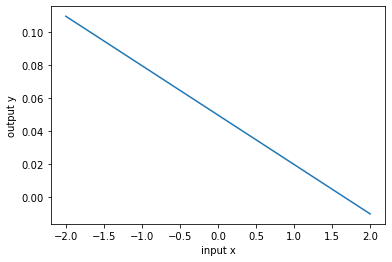

33


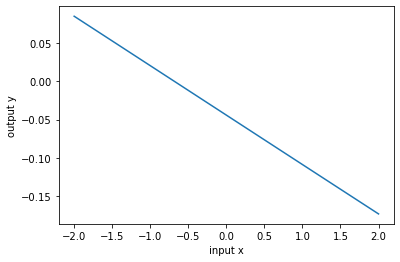

34


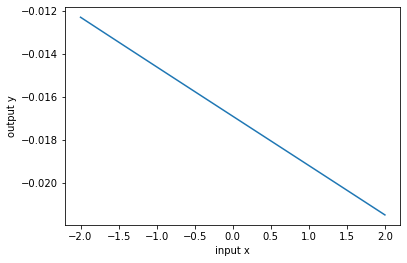

35


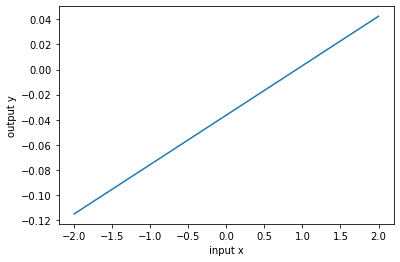

36


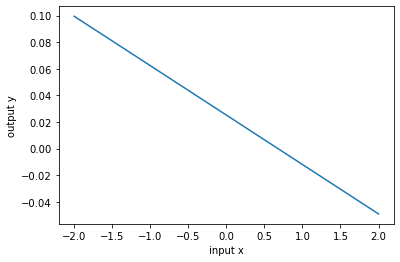

37


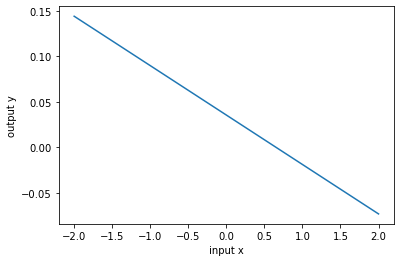

38


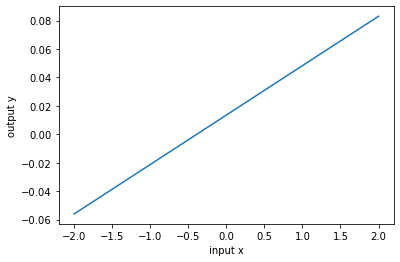

39


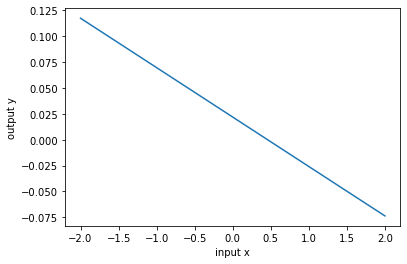

40


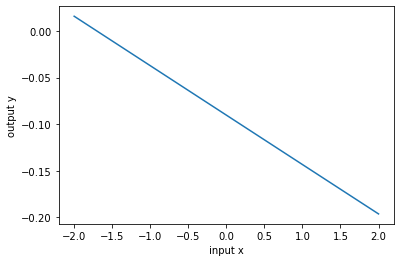

41


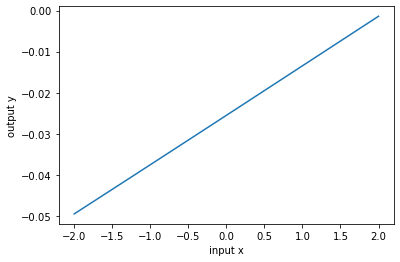

42


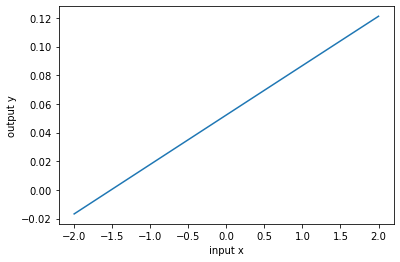

43


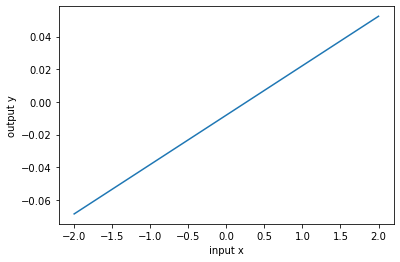

44


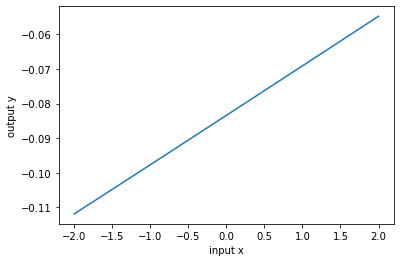

45


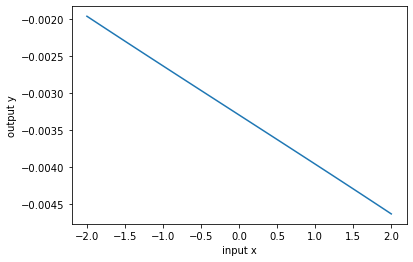

46


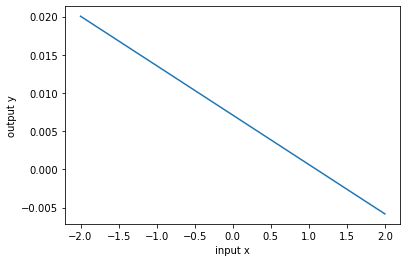

47


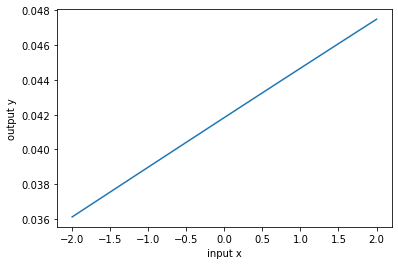

48


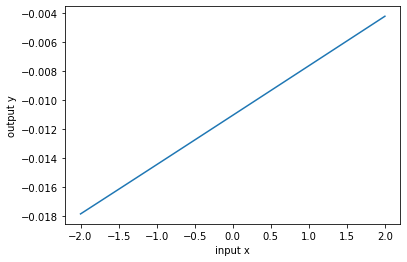

49


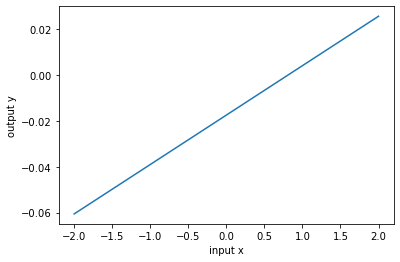

In [24]:

plot_MLP(50,10,a,w,b,x_range,0.01) #minimized the error, less noise